## Preparation

In [1]:
import math
import numpy as np
from scipy.stats import rankdata
from bencheval.data import load_ordinal_benchmark, ordinal_benchmark_list
from bencheval.utils.win_rate import WinningRate
from bencheval.utils.metric import get_rank_diff

new_dataset_name_list = []
for dataset_name in ordinal_benchmark_list:
    data, cols = load_ordinal_benchmark(dataset_name, do_rerank=False)
    wr = WinningRate(data, cols)
    new_rank = rankdata(-wr.get_winning_rate())
    old_rank = np.arange(len(data))
    rank_diff = get_rank_diff(new_rank, old_rank)

    tot = 0
    for c in cols:
        for i in data[c].values:
            if math.isnan(i):
                tot += 1.0

    # if there are too missing values, we skip this benchmark
    if dataset_name != "Random" and tot / len(data) / len(cols) > 0.2:
        print("%s, %.2lf, %.2lf, %.2lf" % (dataset_name, rank_diff[0], rank_diff[1], tot / len(data) / len(cols)))
        continue
    # if the rank difference is too large, we skip this benchmark
    if rank_diff[0] > 0.1:
        print("%s, %.2lf, %.2lf, %.2lf" % (dataset_name, rank_diff[0], rank_diff[1], tot / len(data) / len(cols)))
        continue
    new_dataset_name_list.append(dataset_name)

dataset_name_list = new_dataset_name_list
dataset_name_list




HELM-bias, 0.18, 0.47, 0.36
HELM-calibration, 0.03, 0.15, 0.34
HELM-efficiency, 0.11, 0.32, 0.63
HELM-summarization, 0.17, 0.65, 0.58
HELM-toxicity, 0.25, 0.64, 0.24
HEIM-nsfw, 0.20, 0.40, 0.00
HEIM-black_out, 0.12, 0.30, 0.00
HEIM-originality, 0.49, 0.72, 0.00


['BigCode',
 'HELM-accuracy',
 'HELM-fairness',
 'HELM-robustness',
 'HEIM-alignment_auto',
 'HEIM-quality_auto',
 'HEIM-aesthetics_auto',
 'HEIM-alignment_human',
 'HEIM-nudity',
 'HEIM-quality_human',
 'HEIM-aesthetics_human']

## Trade off between Diversity and Sensitivity

### Sensitivity

In [2]:
from bencheval.data import load_ordinal_benchmark
from bencheval.measures.ordinal import get_sensitivity

sensitivity = {}
for dataset_name in dataset_name_list:
    data, cols = load_ordinal_benchmark(dataset_name)
    sensitivity[dataset_name] = get_sensitivity(data, cols)
    print("%s, %.2lf, %.2lf" % (dataset_name, sensitivity[dataset_name][0], sensitivity[dataset_name][1]))

Episode 0, loss 0.00
Episode 999, loss 1.92
BigCode, 0.04, 0.14
Episode 265, loss 0.00
Episode 999, loss 3.46
HELM-accuracy, 0.32, 0.67
Episode 57, loss 0.00
Episode 999, loss 4.67
HELM-fairness, 0.18, 0.58
Episode 586, loss 0.00
Episode 999, loss 3.70
HELM-robustness, 0.26, 0.58
Episode 0, loss 0.00
Episode 999, loss 0.60
HEIM-alignment_auto, 0.30, 0.50
Episode 0, loss 0.00
Episode 999, loss 1.00
HEIM-quality_auto, 0.20, 0.25
Episode 115, loss 0.00
Episode 999, loss 0.39
HEIM-aesthetics_auto, 0.40, 0.50
Episode 14, loss 0.00
Episode 999, loss 1.37
HEIM-alignment_human, 0.10, 0.25
Episode 0, loss 0.00
Episode 999, loss 0.26
HEIM-nudity, 0.45, 0.75
Episode 0, loss 0.00
Episode 999, loss 0.52
HEIM-quality_human, 0.10, 0.25
Episode 1, loss 0.00
Episode 999, loss 0.18
HEIM-aesthetics_human, 0.20, 0.25


### Diversity
How largely the rankings on each task differ from each other?

In [3]:
from bencheval.data import load_ordinal_benchmark
from bencheval.measures.ordinal import get_diversity

diversity = {}
for dataset_name in dataset_name_list:
    data, cols = load_ordinal_benchmark(dataset_name)
    diversity[dataset_name] = get_diversity(data, cols)
    print("%s, %.2lf, %.2lf" % (dataset_name, sensitivity[dataset_name][0], sensitivity[dataset_name][1]))


BigCode, 0.04, 0.14
HELM-accuracy, 0.32, 0.67
HELM-fairness, 0.18, 0.58
HELM-robustness, 0.26, 0.58
HEIM-alignment_auto, 0.30, 0.50
HEIM-quality_auto, 0.20, 0.25
HEIM-aesthetics_auto, 0.40, 0.50
HEIM-alignment_human, 0.10, 0.25
HEIM-nudity, 0.45, 0.75
HEIM-quality_human, 0.10, 0.25
HEIM-aesthetics_human, 0.20, 0.25


### Dummy Baselines

In [4]:
from bencheval.data import load_ordinal_benchmark
from bencheval.measures.ordinal import get_sensitivity, get_diversity

num_seed = 5
for dataset_name in ["Constant"]:
    for seed in range(num_seed):
        data, cols = load_ordinal_benchmark(dataset_name, seed=seed)
        if dataset_name not in sensitivity.keys():
            sensitivity[dataset_name] = np.array(get_sensitivity(data, cols))
        else:
            sensitivity[dataset_name] += np.array(get_sensitivity(data, cols))
    sensitivity[dataset_name] /= float(num_seed)

for dataset_name in ["Random"]:
    for seed in range(num_seed):
        data, cols = load_ordinal_benchmark(dataset_name, seed=seed)
        if dataset_name not in sensitivity.keys():
            sensitivity[dataset_name] = np.array(get_sensitivity(data, cols, inv_indices=np.arange(10)))
        else:
            sensitivity[dataset_name] += np.array(get_sensitivity(data, cols, inv_indices=np.arange(10)))
    sensitivity[dataset_name] /= float(num_seed)

for dataset_name in ["Constant", "Random"]:
    for seed in range(num_seed):
        data, cols = load_ordinal_benchmark(dataset_name, seed=seed)
        if dataset_name not in diversity.keys():
            diversity[dataset_name] = np.array(get_diversity(data, cols))
        else:
            diversity[dataset_name] += np.array(get_diversity(data, cols))
    diversity[dataset_name] /= float(num_seed)


Episode 0, loss 0.00
Episode 999, loss 13.30
Episode 0, loss 0.00
Episode 999, loss 13.30
Episode 0, loss 0.00
Episode 999, loss 13.30
Episode 0, loss 0.00
Episode 999, loss 13.30
Episode 0, loss 0.00
Episode 999, loss 13.30
Episode 271, loss 0.00
Episode 88, loss -0.00
Episode 371, loss 0.00
Episode 123, loss -0.00
Episode 81, loss 0.00
Episode 227, loss -0.02
Episode 187, loss 0.00
Episode 125, loss -0.00
Episode 130, loss 0.00
Episode 328, loss -0.01


### Save the data

In [5]:
import os
import joblib as jbl

dir_cache = os.path.join(os.getcwd(), ".cache")
os.makedirs(dir_cache, exist_ok=True)
path_sensitivity = os.path.join(dir_cache, "ordinal_sensitivity.jbl")
path_diversity = os.path.join(dir_cache, "ordinal_diversity.jbl")


In [6]:

jbl.dump(sensitivity, path_sensitivity)
jbl.dump(diversity, path_diversity)


['/Users/gzhang/Codes/Project-BenchmarkAggregation/.cache/ordinal_diversity.jbl']

In [7]:
sensitivity = jbl.load(path_sensitivity)
diversity = jbl.load(path_diversity)

### Draw the figures    

In [8]:
!pip install adjustText

Corr=0.68


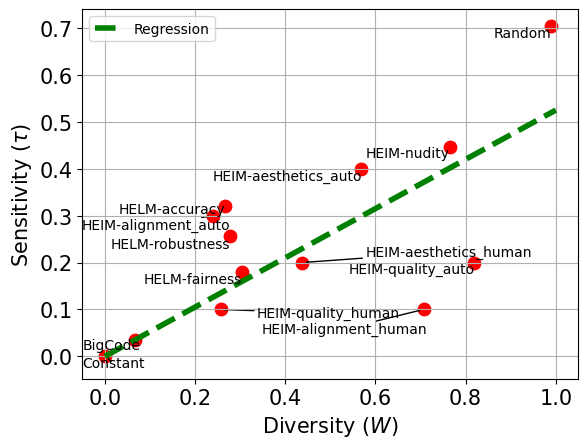

In [9]:
from adjustText import adjust_text
from zarth_utils.drawer import Drawer

all_point_names = [i for i in list(sensitivity.keys()) if "Interpolation" not in i]
x = [diversity[i][0] for i in all_point_names]
y = [sensitivity[i][0] for i in all_point_names]
print("Corr=%.2lf" % float(np.corrcoef(np.array(x), np.array(y))[0, 1]))

drawer = Drawer(unit_row_length=6.4, unit_col_length=4.8)
ax = drawer.draw_one_axes(x, [y], index=1, xlabel="Diversity ($W$)", ylabel=r'Sensitivity ($\tau$)',
                          mode="scatter", use_marker=True, linewidth=80)

texts = []
for i, label in enumerate(all_point_names):
    texts.append(ax.text(x[i], y[i], label, fontsize=10))
adjust_text(texts, arrowprops=dict(arrowstyle="->", color='black'))
ax.grid()

from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

x = np.array(x).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)
clf = Pipeline([
    ("poly", PolynomialFeatures(degree=1, include_bias=False)),
    ("lin_reg", Ridge(fit_intercept=False, alpha=0.0))
])
clf.fit(x, y)

x2 = np.linspace(0.00, 1.00, 100).reshape(-1, 1)
y2 = clf.predict(x2.reshape(-1, 1)).reshape(-1, 1)
ax.plot(x2, y2, color="green", linewidth=4, linestyle="--", label="Regression")

ax.legend()
drawer.save("ordinal_trade_off_tau.pdf")


Corr=0.50


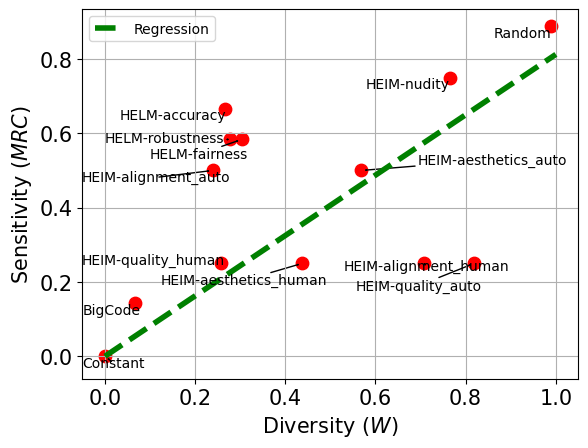

In [10]:
from adjustText import adjust_text
from zarth_utils.drawer import Drawer

all_point_names = [i for i in list(sensitivity.keys()) if "Interpolation" not in i]
x = [diversity[i][0] for i in all_point_names]
y = [sensitivity[i][1] for i in all_point_names]
print("Corr=%.2lf" % float(np.corrcoef(np.array(x), np.array(y))[0, 1]))

drawer = Drawer(unit_row_length=6.4, unit_col_length=4.8)
ax = drawer.draw_one_axes(x, [y], index=1, xlabel=r"Diversity ($W$)", ylabel=r'Sensitivity ($MRC$)',
                          mode="scatter", use_marker=True, linewidth=80)
texts = []
for i, label in enumerate(all_point_names):
    texts.append(ax.text(x[i], y[i], label, fontsize=10))
adjust_text(texts, arrowprops=dict(arrowstyle="->", color='black'))

ax.grid()

from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

x = np.array(x).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)
clf = Pipeline([
    ("poly", PolynomialFeatures(degree=1, include_bias=False)),
    ("lin_reg", Ridge(fit_intercept=False, alpha=0.0))
])
clf.fit(x, y)

x2 = np.linspace(0.00, 1.00, 100).reshape(-1, 1)
y2 = clf.predict(x2.reshape(-1, 1)).reshape(-1, 1)
ax.plot(x2, y2, color="green", linewidth=4, linestyle="--", label="Regression")

ax.legend()
drawer.save("ordinal_trade_off_MRC.pdf")


## Subset Rank Change Experiment

In [11]:
from bencheval.data import load_ordinal_benchmark

np.random.seed(0)

x = list(np.arange(1, 7))
y1_all, y2_all = [], []
ret_dataset_name_list = []
for dataset_name in dataset_name_list:
    if dataset_name in ["BigCode"]:
        continue
    ret_dataset_name_list.append(dataset_name)
    data, cols = load_ordinal_benchmark(dataset_name)
    old_rank = rankdata(-WinningRate(data, cols).get_winning_rate())
    y1, y2 = [], []
    for subset_size in x:
        min_y = (1, 1)
        for _ in range(1000):
            subset = list(np.random.choice(cols, subset_size, replace=False))
            new_rank = rankdata(-WinningRate(data, subset).get_winning_rate())
            res = get_rank_diff(new_rank, old_rank)
            if res < min_y:
                min_y = res
        y1.append(min_y[0])
        y2.append(min_y[1])
    y1_all.append(y1)
    y2_all.append(y2)

In [12]:
import joblib as jbl

dir_cache = os.path.join(os.getcwd(), ".cache")
os.makedirs(dir_cache, exist_ok=True)

In [13]:
jbl.dump((x, y1_all, y2_all, ret_dataset_name_list), os.path.join(dir_cache, "ordinal_subset_rank_change.jbl"))

['/Users/gzhang/Codes/Project-BenchmarkAggregation/.cache/ordinal_subset_rank_change.jbl']

In [14]:
x1, y1_all, y2_all, ret_dataset_name_list = jbl.load(os.path.join(dir_cache, "ordinal_subset_rank_change.jbl"))

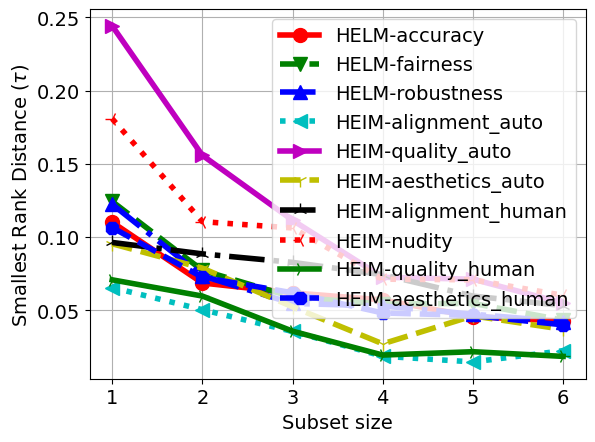

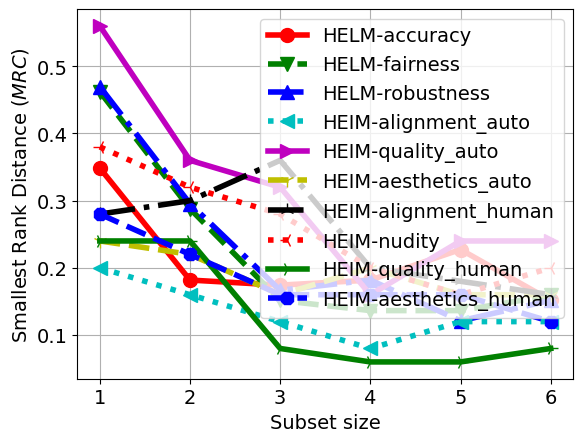

In [15]:

drawer = Drawer(num_col=1, num_row=1, unit_row_length=6.4, unit_col_length=4.8)
ax = drawer.draw_one_axes(x, y1_all, index=1, xlabel="Subset size", ylabel=r"Smallest Rank Distance ($\tau$)",
                          labels=ret_dataset_name_list, mode="plot",
                          linewidth=4, fontsize=14, use_marker=True, markersize=10)
ax.grid()
drawer.save("ordinal_subset_min_tau.pdf")

drawer = Drawer(num_col=1, num_row=1, unit_row_length=6.4, unit_col_length=4.8)
ax = drawer.draw_one_axes(x, y2_all, index=1, xlabel="Subset size", ylabel=r"Smallest Rank Distance ($MRC$)",
                          labels=ret_dataset_name_list, mode="plot",
                          linewidth=4, fontsize=14, use_marker=True, markersize=10)
ax.grid()
drawer.save("ordinal_subset_min_mrc.pdf")


